In [1]:
pip install chart_studio

     |████████████████████████████████| 64 kB 2.2 MB/s 


#1. Importing essential libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings("ignore")

#2. Loading dataset

In [3]:
df= pd.read_csv(r"/content/archive (1).zip")
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [4]:
df.dtypes

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

In [5]:
df.isnull().sum()

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [6]:
df.shape

(2755, 7)

There are 2755 records(Billionaires in the dataset)

#3. Converting the networth column for proper datatype and values

In [7]:
#Replacing/removing the $ sign from the column networth

df["NetWorth"]= df.NetWorth.apply(lambda x:str(x).replace("$",""))

In [8]:
#similarly replacing the "B"

df["NetWorth"]= df.NetWorth.apply(lambda x:str(x).replace("B",""))

In [9]:
#Removing the extra space in the values

df["NetWorth"]= df.NetWorth.apply(lambda x:str(x).replace(" ",""))

In [10]:
#Converting the networth column to float

df["NetWorth"]= df.NetWorth.apply(lambda x:float(x))

#4. EDA

In [11]:
#Total value of Net worth of all billionaires

df.NetWorth.sum()

13084.099999999999

The total value of billionaires combined is over 13 Trillion dollars

In [12]:
#Top 20 Billionaires

x= df.groupby("Name").NetWorth.sum().sort_values(ascending= False).head(20)
x

Name
Jeff Bezos                               177.0
Elon Musk                                151.0
Bernard Arnault & family                 150.0
Bill Gates                               124.0
Mark Zuckerberg                           97.0
Warren Buffett                            96.0
Larry Ellison                             93.0
Larry Page                                91.5
Sergey Brin                               89.0
Mukesh Ambani                             84.5
Amancio Ortega                            77.0
Francoise Bettencourt Meyers & family     73.6
Zhong Shanshan                            68.9
Steve Ballmer                             68.7
Ma Huateng                                65.8
Carlos Slim Helu & family                 62.8
Alice Walton                              61.8
Jim Walton                                60.2
Rob Walton                                59.5
Michael Bloomberg                         59.0
Name: NetWorth, dtype: float64

In [54]:
dx= df[df["Rank"]<20]
ax= px.bar(dx,x= "NetWorth",y= "Name",color= "NetWorth",labels= {"NetWorth":"Networth(in Billions)"},template= "plotly_dark")
ax.show()

Jeff Bezos is the richest person on the planet with a total networth of 177Billion Followed by Elon Musk Other notable mentions are Mark Zuckerberg,Bill Gates,Mukesh Ambani,Larry Page,etc

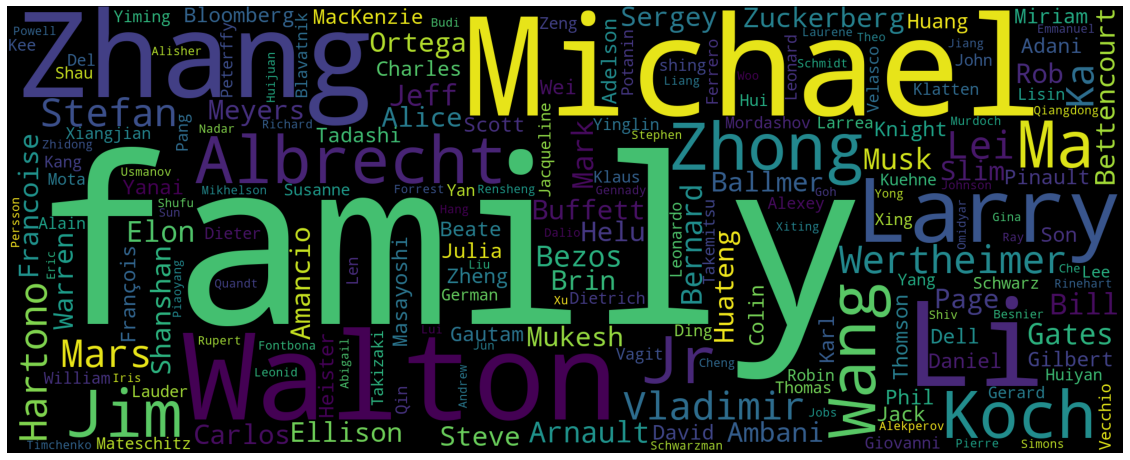

In [17]:
#Word cloud representing the top 100 billionaires

from wordcloud import WordCloud, STOPWORDS
dx= df[df["Rank"]<100]
plt.figure(figsize= (20,20))
words= " ".join(dx["Name"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   

In [57]:
#Countries with most contribution to the total value.

x= df.groupby("Country").NetWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()
ax= px.bar(x,x= "NetWorth",y= "Country",color= "NetWorth",labels= {"NetWorth":"Total value(in Billions)"})
ax.show()

USA and China contribute most to the total values of billionaires followed by Germany and India

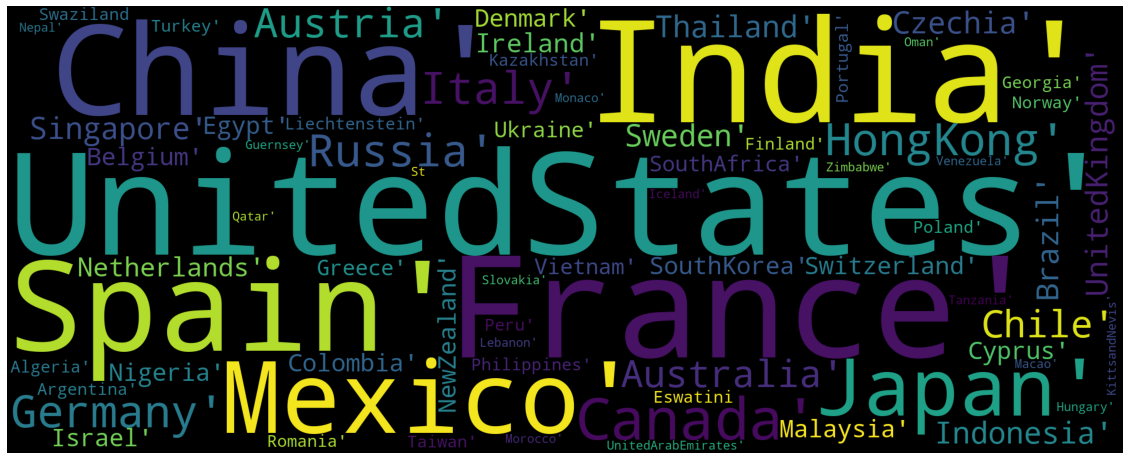

In [22]:
#Word cloud representing the top Countries

plt.figure(figsize= (20,20))
x= df
x["Country"]= x.Country.apply(lambda x: str(x).replace(" ",""))
words=str(x["Country"].unique())
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   

In [23]:
#Countries with least contribution to the total value.

x= df.groupby("Country").NetWorth.sum().sort_values(ascending= False).tail(10)
x

Country
Macao               3.1
Qatar               2.9
Slovakia            2.9
Hungary             2.7
Guernsey            2.6
Oman                2.3
St.KittsandNevis    1.6
Tanzania            1.6
Zimbabwe            1.5
Nepal               1.4
Name: NetWorth, dtype: float64

In [24]:
#Countries with most number of Billionaires(top 20)

x= pd.DataFrame(df.Country.value_counts().head(20).reset_index().values, columns=["Country", "No of Billionaires"])
x["No of Billionaires"]=x["No of Billionaires"].apply(lambda x: int(x))
ax= px.bar(x,x= "No of Billionaires",y= "Country",color= "No of Billionaires",template= "plotly_dark")
ax.show()

The USA has produced most number of 724 Billionaires out of 2755 followed by China(626 Billionaires) India ranks 3rd with a major difference from the first 2 countries number

In [25]:
#Countries with least number of Billionaires

df.Country.value_counts().tail(20)

Qatar                  2
Slovakia               2
Georgia                2
NewZealand             2
Iceland                2
Hungary                2
Portugal               2
Romania                2
Morocco                2
Liechtenstein          1
Oman                   1
Eswatini(Swaziland)    1
Tanzania               1
Nepal                  1
Algeria                1
Venezuela              1
Zimbabwe               1
St.KittsandNevis       1
Macao                  1
Guernsey               1
Name: Country, dtype: int64

#5. Top sources of Billionaires

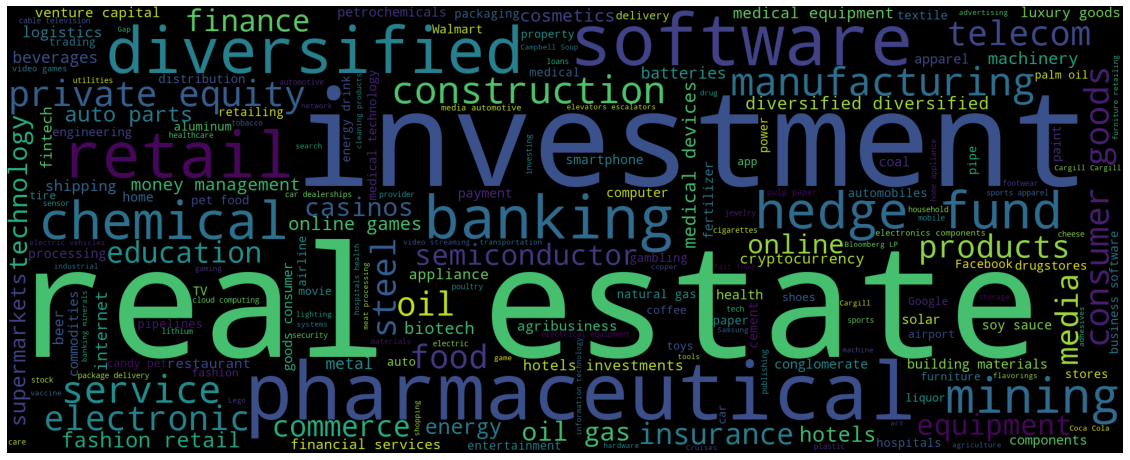

In [30]:
#Word cloud representing the top Sources

plt.figure(figsize= (20,20))
words= " ".join(df["Source"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   

In [31]:
df.groupby("Source").NetWorth.sum().sort_values(ascending= False).head(20)

Source
real estate        686.1
diversified        378.2
investments        339.2
pharmaceuticals    335.3
software           275.8
hedge funds        240.1
Amazon             230.0
e-commerce         225.5
Walmart            220.2
Google             216.4
Microsoft          197.7
retail             159.9
Tesla, SpaceX      151.0
LVMH               150.0
Facebook           142.4
mining             141.6
telecom            126.4
private equity     124.0
chemicals          106.4
banking            106.4
Name: NetWorth, dtype: float64

In [39]:
#Top sources of Billionaires

x= df.groupby("Source").NetWorth.sum().sort_values(ascending= False).head(10).to_frame().reset_index()
ax= px.bar(x,x= "NetWorth",y= "Source",color= "NetWorth",labels= {"NetWorth":"Total value(in Billions)"},template= "plotly_dark")
ax.show()

The real estate source contributes the most values with a total of 686 Billions followed by diverified and investments Other notable sources are Amazon(230Billion) ,Google(216Billion),Microsoft(197Billion),etc

In [42]:
#Sources producing least value

df.groupby("Source").NetWorth.sum().sort_values(ascending= False).tail(20)

Source
telecom, lotteries, insurance    1.0
kombucha                         1.0
pharmacy                         1.0
teeth aligners                   1.0
tiles                            1.0
internet services                1.0
Shoes                            1.0
toll roads                       1.0
oil, mining                      1.0
movies, television               1.0
stock trading app                1.0
Citigroup                        1.0
stock trading                    1.0
defense contractor               1.0
packaged meats                   1.0
Fiberglass                       1.0
high speed trading               1.0
fisheries                        1.0
flavors and fragrances           1.0
cosmetics, reality TV            1.0
Name: NetWorth, dtype: float64

#6. Further analysis on Indian Billionaires

In [44]:
#creating separate dataframe for India

x= df[df["Country"]=="India"]

In [45]:
len(x)

140

There are 140 Billionaires in India out of 2755 total

In [46]:
x.NetWorth.sum()

596.4

596.4 Billion is the overall networth of Indian Billionaires

In [47]:
#Top 20 Billionaires in India

x.groupby("Name").NetWorth.sum().sort_values(ascending= False).head(20)

Name
Mukesh Ambani                             84.5
Gautam Adani & family                     50.5
Shiv Nadar                                23.5
Radhakishan Damani                        16.5
Uday Kotak                                15.9
Lakshmi Mittal                            14.9
Kumar Birla                               12.8
Cyrus Poonawalla                          12.7
Dilip Shanghvi                            10.9
Sunil Mittal & family                     10.5
Savitri Jindal & family                    9.7
Benu Gopal Bangur                          8.7
Azim Premji                                8.6
Kuldip Singh & Gurbachan Singh Dhingra     8.4
Kushal Pal Singh                           8.3
Bajaj brothers                             7.0
Murali Divi & family                       6.8
Gopikishan Damani                          6.5
Rahul Bajaj                                6.3
Ashwin Dani & family                       6.3
Name: NetWorth, dtype: float64

Mukesh Ambani is the richest person in India followed by Gautam Adani and Shiv Nadar

In [48]:
dx= x.groupby("Name").NetWorth.sum().sort_values(ascending= False).head(20).to_frame().reset_index()

In [49]:
#Pie chart representation of Indian Billionaires(top 20)

ax= px.pie(dx,names="Name",values= "NetWorth" )
ax.show()

In [51]:
#Top 10 sources in India

x.Source.value_counts().head(10)

pharmaceuticals      18
consumer goods       16
diversified           9
real estate           8
software services     7
chemicals             4
adhesives             4
paints                4
cement                3
footwear              3
Name: Source, dtype: int64

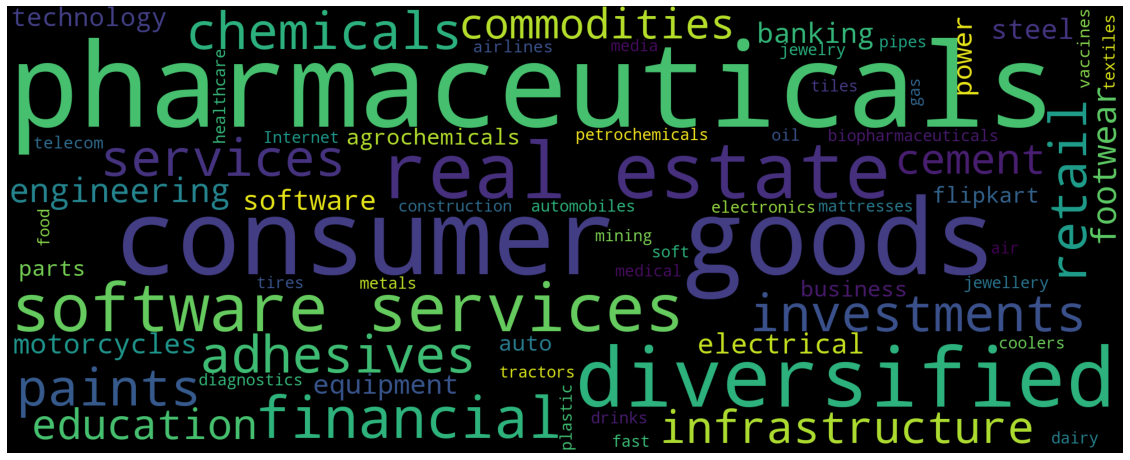

In [52]:
#Word cloud representing of sources in India

plt.figure(figsize= (20,20))
words= " ".join(x["Source"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()   

# Final Conclusions:

-2755 number of billionaires with 13 trillion dollars of net worth

-Jeff Bezos and Elon Musk are richest on the planet

-USA and China produce most number of billionaires and also total values

-USA alone has 724 Billionaires contributing more than 4 Trillion dollars of networth

-Real Estate and diversified sources contribute to the highest value of in terms of sources followed by Investments

-140 Billionaires in India

-Mukesh Ambani richest in India(84.5 Billion dollars)

-pharmaceuticals and consumer goods are the top sources in India